# Setup

In [ ]:
from openai import OpenAI

from IPython.display import display, Markdown, Image, JSON, Code

import base64

from dotenv import load_dotenv
import os
import json

load_dotenv()

# Set the API key and endpoint
api_key = os.getenv('OPENAI_API_KEY')
org = os.getenv('OPENAI_ORG')
project = os.getenv('OPENAI_PROJECT')
# model = "gpt-5-mini-2025-08-07"
model = "gpt-4.1-mini"
print(api_key[:20], "...")
print(org[:8], "...")
print(project[:8], "...")

In [140]:
client = OpenAI(
    api_key=api_key,
    organization=org,
    project=project
)


# Tools

https://platform.openai.com/docs/guides/tools

## Web Search Tool

In [164]:
response = client.responses.create(
    model="gpt-5-mini",
    input="Show me the full acedemic calendar for the University of Technology Sydney spring 2026 term?"
)

display(Markdown(response.output_text))

Do you mean the UTS Semester 2 (July–November) 2026 academic term, or a different “spring” session (e.g., a trimester, mid‑year session, or Northern‑Hemisphere spring)? Also, which level of detail do you want — every single date (orientation, enrolment opening/closing, census date, teaching weeks, mid‑semester break, study week, exams, results release, holidays), or just the main dates (classes start/end and exams)?

Tell me which term and the level of detail you want and I’ll either:
- pull together a full, itemized calendar for you (if you can paste the official dates or allow web access), or
- show a typical UTS Semester 2 calendar layout and point you to the official UTS Academic Calendar page so you can confirm exact 2026 dates.

In [165]:
response = client.responses.create(
    model="gpt-5-mini",
    tools=[{"type": "web_search"}],
    input="Show me the full acedemic calendar for the University of Technology Sydney spring 2026 term?"
)

display(Markdown(response.output_text))

Do you mean the UTS Main Calendar (Primary Teaching Sessions) “Spring session” (Session 2)? If so — here are the official, full Spring 2026 academic dates from UTS (Primary teaching / Main Calendar). I’ve listed each event and its exact date:

- Orientation: Monday 20 July – Friday 24 July 2026. ([uts.edu.au](https://www.uts.edu.au/for-students/current-students/managing-your-course/important-dates/academic-year-dates/2026-academic-year-dates?utm_source=openai))  
- Session commences: Monday 27 July 2026. ([uts.edu.au](https://www.uts.edu.au/for-students/current-students/managing-your-course/important-dates/academic-year-dates/2026-academic-year-dates?utm_source=openai))  
- Last day to enrol: Monday 10 August 2026. ([uts.edu.au](https://www.uts.edu.au/for-students/current-students/managing-your-course/important-dates/academic-year-dates/2026-academic-year-dates?utm_source=openai))  
- Census date: Thursday 27 August 2026. ([uts.edu.au](https://www.uts.edu.au/for-students/current-students/managing-your-course/important-dates/academic-year-dates/2026-academic-year-dates?utm_source=openai))  
- Mid-session StuVac (study vacation): Monday 21 September – Sunday 27 September 2026. ([uts.edu.au](https://www.uts.edu.au/for-students/current-students/managing-your-course/important-dates/academic-year-dates/2026-academic-year-dates?utm_source=openai))  
- Formal classes end: Friday 23 October 2026. ([uts.edu.au](https://www.uts.edu.au/for-students/current-students/managing-your-course/important-dates/academic-year-dates/2026-academic-year-dates?utm_source=openai))  
- Final StuVac (study vacation): Monday 26 October – Friday 30 October 2026. ([uts.edu.au](https://www.uts.edu.au/for-students/current-students/managing-your-course/important-dates/academic-year-dates/2026-academic-year-dates?utm_source=openai))  
- Final assessment period (exams/assessments): Saturday 31 October – Saturday 21 November 2026. ([uts.edu.au](https://www.uts.edu.au/for-students/current-students/managing-your-course/important-dates/academic-year-dates/2026-academic-year-dates?utm_source=openai))  
- Results publication date: Monday 14 December 2026. ([uts.edu.au](https://www.uts.edu.au/for-students/current-students/managing-your-course/important-dates/academic-year-dates/2026-academic-year-dates?utm_source=openai))  
- Rescheduled and alternative exam period: Monday 14 December – Friday 18 December 2026. ([uts.edu.au](https://www.uts.edu.au/for-students/current-students/managing-your-course/important-dates/academic-year-dates/2026-academic-year-dates?utm_source=openai))  
- Session ends: Thursday 31 December 2026. ([uts.edu.au](https://www.uts.edu.au/for-students/current-students/managing-your-course/important-dates/academic-year-dates/2026-academic-year-dates?utm_source=openai))

Notes:
- UTS also publishes separate timelines for other calendars (e.g., UTS Online, Education UG/PG “Calendar D”, and the Parallel Calendar). If you’re enrolled in a postgraduate online course or a program on a non‑main calendar, the session start/end and census/enrolment rules may differ. ([uts.edu.au](https://www.uts.edu.au/for-students/current-students/managing-your-course/important-dates/academic-year-dates/2026-academic-year-dates?utm_source=openai))
- If you’d like, I can: (a) show the Spring 2026 dates for a different UTS calendar (Online / Parallel / Education D), (b) export these dates as an .ics or CSV file for import into your calendar, or (c) print a PDF of the official UTS page. Which would you prefer?

## Image Generation tool 

https://platform.openai.com/docs/guides/tools-image-generation

In [143]:
response = client.responses.create(
    model="gpt-5-mini",
    input="Generate an image of gray tabby cat hugging an otter with an orange scarf",
    tools=[{"type": "image_generation"}],
)

# # Save the image to a file
# image_data = [
#     output.result
#     for output in response.output
#     if output.type == "image_generation_call"
# ]



In [144]:
[output.type for output in response.output]

['reasoning', 'image_generation_call', 'message']

In [145]:
# Save the image to a file
image_data = [
    output.result
    for output in response.output
    if output.type == "image_generation_call"
]


In [146]:
image_base64 = image_data[0]

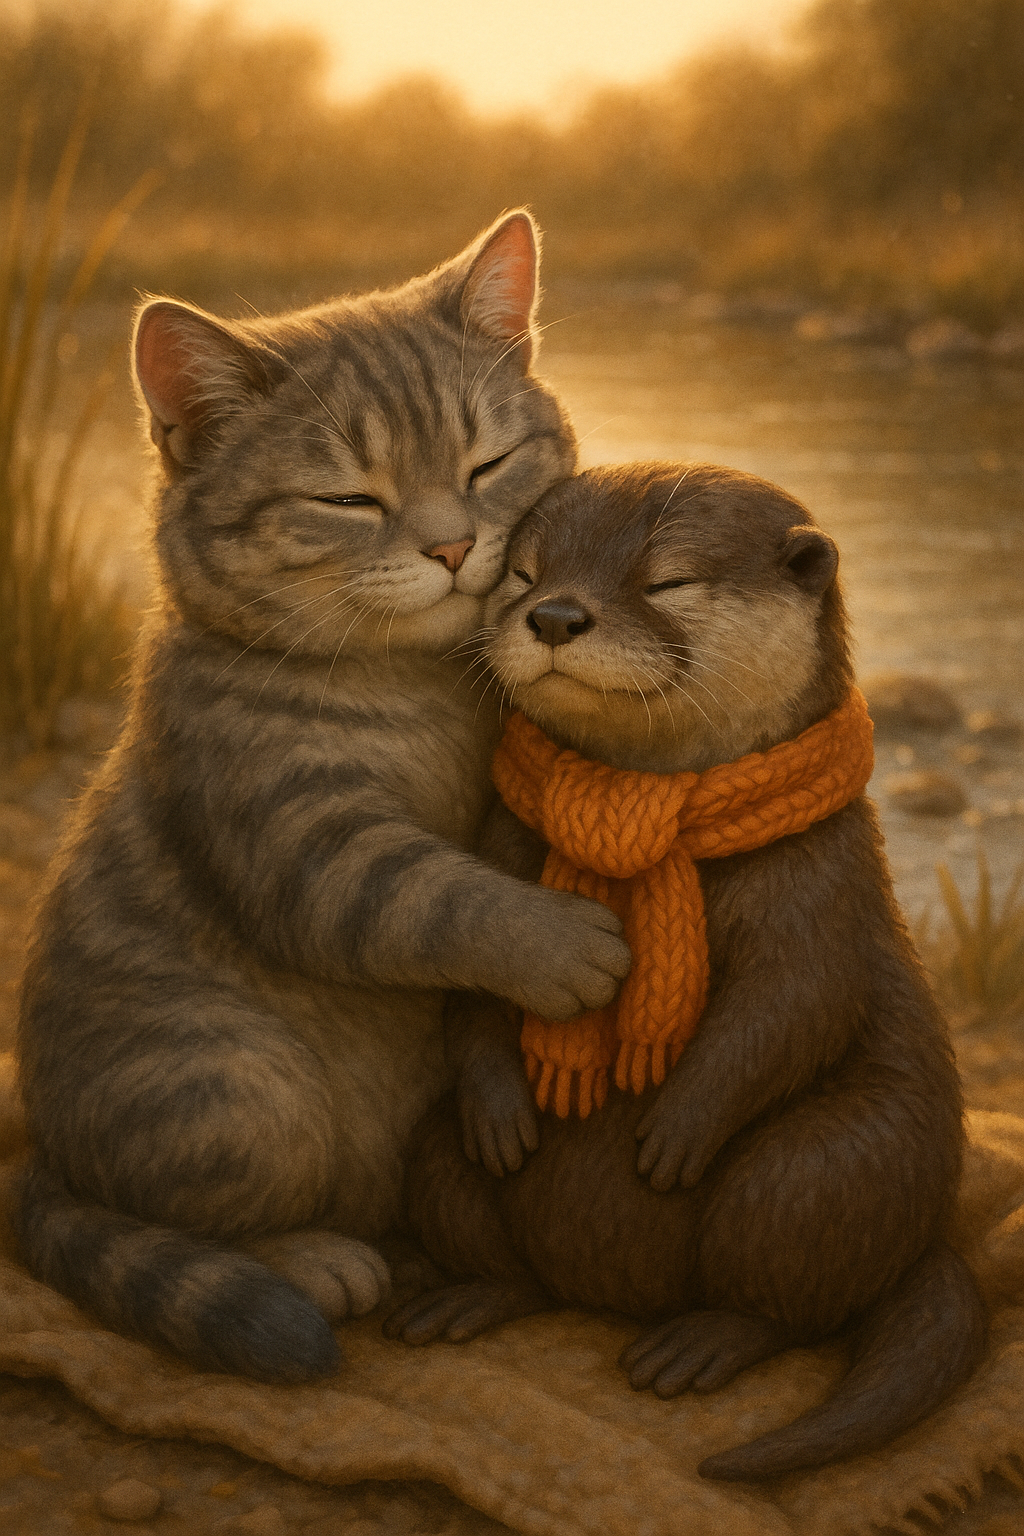

In [147]:
display(Image(data=base64.b64decode(image_base64), width=300))

In [148]:
display(Markdown(response.output[1].revised_prompt))

A heartwarming, adorable scene of a gray tabby cat gently hugging a brown otter that is wearing a bright orange knit scarf. The gray tabby has soft, plush, striped fur (classic tabby markings), expressive half-closed eyes and a peaceful, content expression as it wraps its front paws around the otter. The otter has sleek, slightly wet-looking fur, a sweet relaxed face, and a neatly tied orange scarf around its neck (visible texture of knit yarn). Both animals are seated close together on a cozy, slightly rumpled blanket near a calm riverbank with soft reeds and smooth stones in the background. Warm golden-hour lighting, soft rim light on their fur, gentle bokeh background, shallow depth of field. Composition centered, showing their full upper bodies and faces in a 3/4 view, intimate close-up framing. Style: high-quality semi-realistic digital illustration with richly detailed fur textures and soft painterly colors, cute and wholesome mood. High resolution, no text, no logos, no watermark.

## Code Interpreter tool

In [150]:
instructions = """
You are a data scientist. Use the code interpreter tool to solve the user's problem.
"""

resp = client.responses.create(
    model="gpt-4o-mini",
    tools=[
        {
            "type": "code_interpreter",
            "container": {"type": "auto"}
        }
    ],
    instructions=instructions,
    input="""
    Create a random data set with normal distribution and plot a histogram:
    - 20000 samples
    - mean 170
    - standard deviation 6
    Then calculate the mean and standard deviation of the samples and print them out.
    """,
)

print(resp.output)

[ResponseCodeInterpreterToolCall(id='ci_68d391574cc48197ae56be0119b347df0c52b146724fb4c5', code="import numpy as np\nimport matplotlib.pyplot as plt\n\n# Parameters for the normal distribution\nmean = 170\nstd_dev = 6\nnum_samples = 20000\n\n# Generate random data with normal distribution\ndata = np.random.normal(mean, std_dev, num_samples)\n\n# Calculate mean and standard deviation of the samples\ncalculated_mean = np.mean(data)\ncalculated_std_dev = np.std(data)\n\n# Plot histogram\nplt.figure(figsize=(10, 6))\nplt.hist(data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)\nplt.title('Histogram of Normally Distributed Data')\nplt.xlabel('Value')\nplt.ylabel('Frequency')\nplt.axvline(calculated_mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {calculated_mean:.2f}')\nplt.axvline(calculated_mean + calculated_std_dev, color='green', linestyle='dashed', linewidth=1, label=f'SD: {calculated_std_dev:.2f}')\nplt.axvline(calculated_mean - calculated_std_dev, color='g

In [151]:
print(len(resp.output))

2


In [152]:
print(resp.model_dump_json(indent=2))

{
  "id": "resp_68d391536c6081979541f194970db6a50c52b146724fb4c5",
  "created_at": 1758695763.0,
  "error": null,
  "incomplete_details": null,
  "instructions": "\nYou are a data scientist. Use the code interpreter tool to solve the user's problem.\n",
  "metadata": {},
  "model": "gpt-4o-mini-2024-07-18",
  "object": "response",
  "output": [
    {
      "id": "ci_68d391574cc48197ae56be0119b347df0c52b146724fb4c5",
      "code": "import numpy as np\nimport matplotlib.pyplot as plt\n\n# Parameters for the normal distribution\nmean = 170\nstd_dev = 6\nnum_samples = 20000\n\n# Generate random data with normal distribution\ndata = np.random.normal(mean, std_dev, num_samples)\n\n# Calculate mean and standard deviation of the samples\ncalculated_mean = np.mean(data)\ncalculated_std_dev = np.std(data)\n\n# Plot histogram\nplt.figure(figsize=(10, 6))\nplt.hist(data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)\nplt.title('Histogram of Normally Distributed Data')\nplt.xlabel('Value'

code_interpreter_call


import numpy as np
import matplotlib.pyplot as plt

# Parameters for the normal distribution
mean = 170
std_dev = 6
num_samples = 20000

# Generate random data with normal distribution
data = np.random.normal(mean, std_dev, num_samples)

# Calculate mean and standard deviation of the samples
calculated_mean = np.mean(data)
calculated_std_dev = np.std(data)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Normally Distributed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.axvline(calculated_mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {calculated_mean:.2f}')
plt.axvline(calculated_mean + calculated_std_dev, color='green', linestyle='dashed', linewidth=1, label=f'SD: {calculated_std_dev:.2f}')
plt.axvline(calculated_mean - calculated_std_dev, color='green', linestyle='dashed', linewidth=1)
plt.legend()
plt.grid()
plt.show()

calculated_mean, calculated_std_dev

message


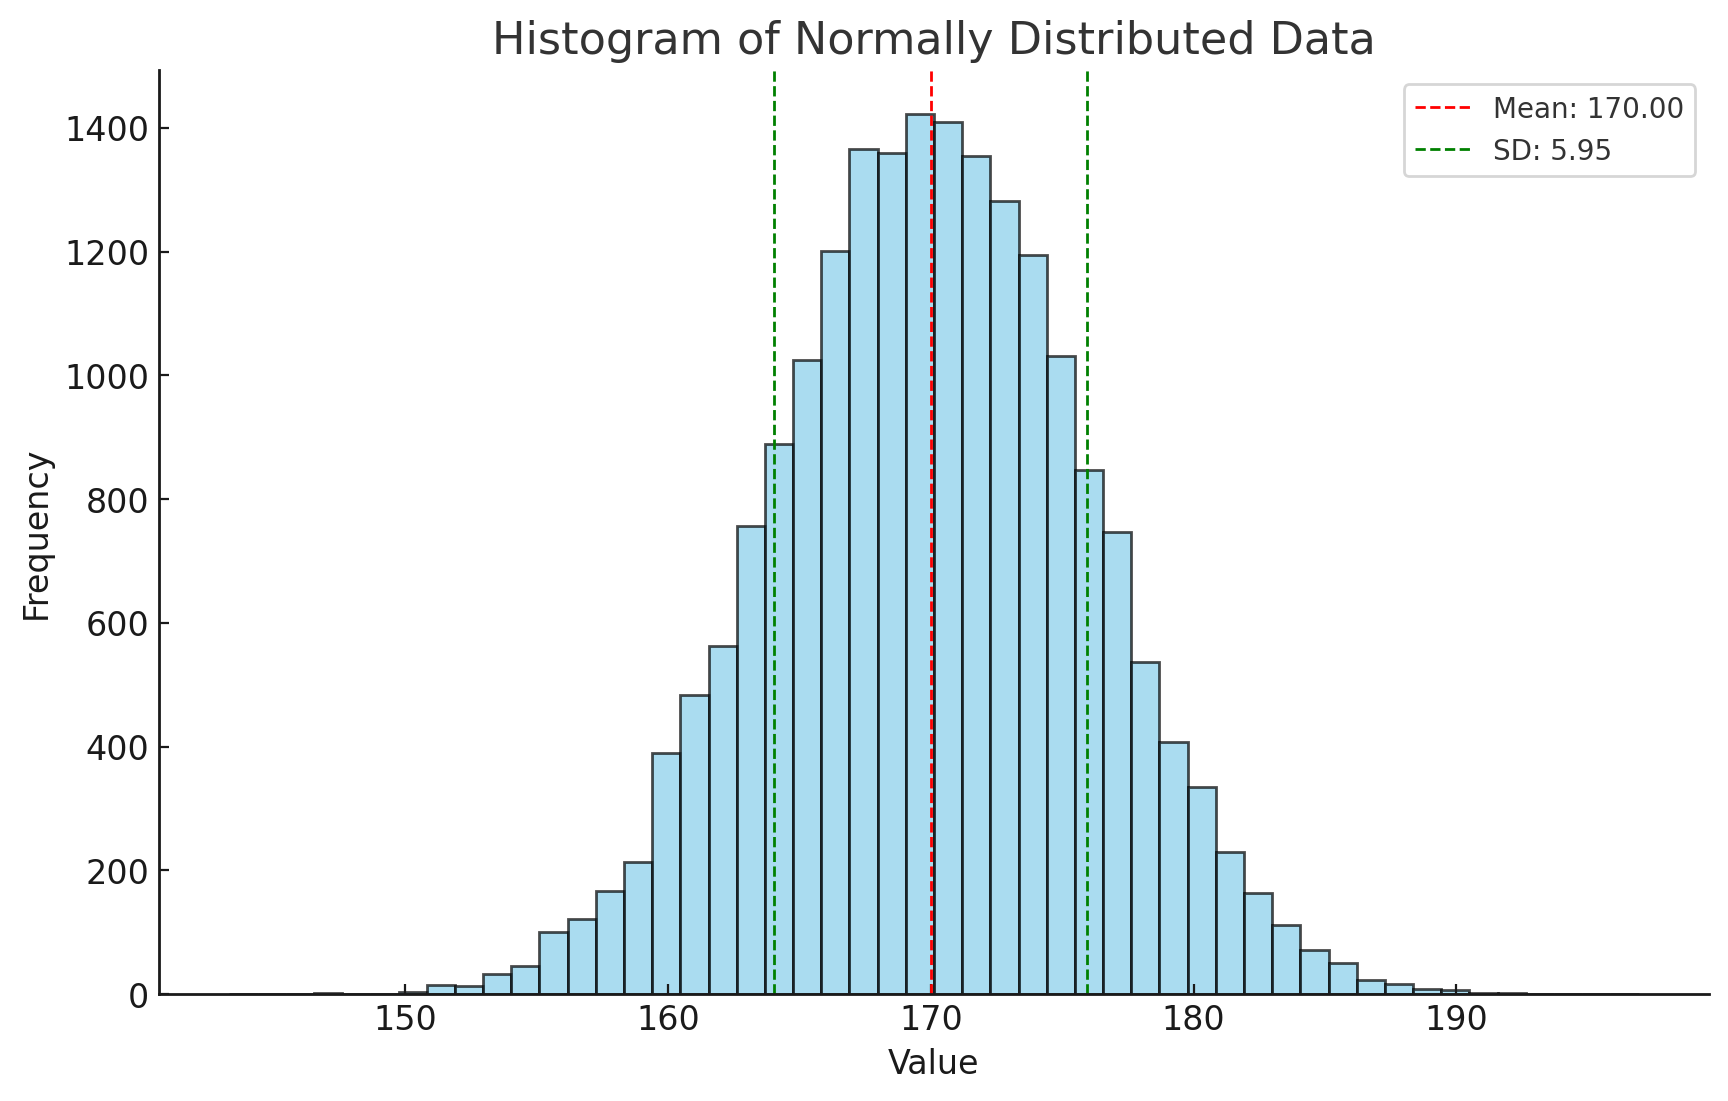

The histogram of the normally distributed dataset has been plotted. Here are the calculated statistics:

- **Mean:** \( 170.00 \)
- **Standard Deviation:** \( 5.95 \)

The mean and standard deviation are very close to the specified values used for the normal distribution. If you need any further analysis or visualizations, let me know!

In [153]:
import requests
for output in resp.output:
    print(output.type)
    if output.type == "code_interpreter_call":
        display(Code(output.code))
    if output.type == "message":
        for annotation in output.content[0].annotations:
            container_id = annotation.container_id
            file_id = annotation.file_id
        url = f"https://api.openai.com/v1/containers/{container_id}/files/{file_id}/content"
        headers = {
            "Authorization": f"Bearer {api_key}"
        }

        file_response = requests.get(url, headers=headers)
        display(Image(file_response.content))

display(Markdown(resp.output_text))

In [154]:
# Heres is a fun one


response = client.responses.create(
    model="gpt-4.1-mini",
    input="Pick a random number from 1 to 50 and return only the number."
)


print(response.output_text)

37


In [155]:
# now repeat the previous request using code interpreter
response = client.responses.create(
    model="gpt-4o-mini",
    tools=[
        {
            "type": "code_interpreter",
            "container": {"type": "auto"}
        }
    ],
    instructions="""
    You are a data scientist. Use the code interpreter tool to solve the user's problem.
    """,
    input="Pick a random number from 1 to 50 and return only the number."
)


In [156]:

for output in response.output:
    print(output.type)
    if output.type == "code_interpreter_call":
        display(Code(output.code))

print(response.output_text)

code_interpreter_call


import random

# Pick a random number from 1 to 50
random_number = random.randint(1, 50)
random_number

message
31


## MCP Tool

In [157]:
response = client.responses.create(
    model="gpt-4o-mini",
    tools=[
        {
            "type": "mcp",
            "server_label": "docsmcp",
            "server_description": "Microsoft and Azure Documentation MCP Tool",
            "server_url": "https://learn.microsoft.com/api/mcp",
            "require_approval": "never",
        },
    ],
    input="what is the az command to log in to azure using cli?",
)

display(Markdown(response.output_text))


To log in to Azure using the Azure CLI, you can use the following command:

```bash
az login
```

This command will open a web browser and prompt you to enter your Azure credentials. If you're running the command in an environment where a web browser isn't available, you can use:

```bash
az login --use-device-code
```

This will provide you with a code to enter on a separate device to complete the login process.

In [9]:
print(response.to_json())


{
  "id": "resp_68d333b371bc819d9303046bc7ba3a5c057128c6479f0a79",
  "created_at": 1758671796.0,
  "error": null,
  "incomplete_details": null,
  "instructions": null,
  "metadata": {},
  "model": "gpt-5-2025-08-07",
  "object": "response",
  "output": [
    {
      "id": "mcpl_68d333b496fc819db4f1247075105ea4057128c6479f0a79",
      "server_label": "docsmcp",
      "tools": [
        {
          "input_schema": {
            "type": "object",
            "properties": {
              "query": {
                "description": "a query or topic about Microsoft/Azure products, services, platforms, developer tools, frameworks, or APIs",
                "type": "string",
                "default": null
              },
              "question": {
                "description": "this parameter is no longer used, use query instead.",
                "type": "string",
                "default": null
              }
            }
          },
          "name": "microsoft_docs_search",
        

# Function Calling

Function calling allows the model extend it's capabilities and request to invoke function to perform specific tasks or retrieve information. 

This is particularly useful for tasks that require structured data or specific actions, such as retrieving information from a database or performing calculations.

## Standard Text response


In [178]:
model_name = "gpt-4o-mini"
response = client.responses.create(
    model=model_name,
    input="How is the weather in Sydney today?"
    )



print(response.output_text)


I can't provide real-time weather updates. However, you can check a reliable weather website or app for the current conditions in Sydney. Would you like tips on where to find that information?


## Function Calling Example


The flow of function calling is as follows:

<img src="https://cdn.openai.com/API/docs/images/function-calling-diagram-steps.png" alt="Function Calling" width="400px"/>

## Define the Function

In [278]:
get_weather_function_definition = {

    "type": "function",
    "name": "get_wttn_function",
    "description": "Retrieves current weather for the given location.",
    "parameters": {
        "type": "object",
        "properties": {
            "location": {
                "type": "string",
                "description": "City name e.g. Bogotá, Paris, New York",
            },
            "units": {
                "type": "string",
                "enum": ["celsius", "fahrenheit"],
                "description": "Units the temperature will be returned in."
            }
        },
        "required": ["location", "units"],
        "additionalProperties": False
    },
    "strict": True
}

tools = [get_weather_function_definition]

In [297]:
def get_weather(location, units="celsius"):
    temperature_c = 25
    if units == "fahrenheit":
        temperature = temperature_c * 9 / 5 + 32
    else:
        temperature = temperature_c
    return {"temperature": temperature, "unit": units, "condition": "sunny"}


def get_wttn_function(location: str, **kwargs) -> str:
    """Get the weather for a given city"""
    print(f"[debug] get_wttn called with city: {location}")#
    endpoint = "https://wttr.in"
    response = requests.get(f"{endpoint}/{location}")
    return response.text

In [307]:
print(get_wttn_function("Auckland", units="celsius"))

[debug] get_wttn called with city: Auckland
Weather report: Auckland

   _`/"".-.     Light rain shower
    ,\_(   ).   16 °C          
     /(___(__)  ↘ 13 km/h      
       ‘ ‘ ‘ ‘  10 km          
      ‘ ‘ ‘ ‘   0.2 mm         
                                                       ┌─────────────┐                                                       
┌──────────────────────────────┬───────────────────────┤  Wed 24 Sep ├───────────────────────┬──────────────────────────────┐
│            Morning           │             Noon      └──────┬──────┘     Evening           │             Night            │
├──────────────────────────────┼──────────────────────────────┼──────────────────────────────┼──────────────────────────────┤
│  _`/"".-.     Light rain sho…│  _`/"".-.     Light rain sho…│  _`/"".-.     Light rain sho…│  _`/"".-.     Light rain sho…│
│   ,\_(   ).   15 °C          │   ,\_(   ).   15 °C          │   ,\_(   ).   +16(14) °C     │   ,\_(   ).   +14(13) °C     │
│    /(___(_

### 1. Send Message with Tools (functions)

In [308]:
input_list = [{
        "role": "user",
        "content": "What is the weather like in Auckland?",
    }
    ]

In [309]:
response = client.responses.create(
    model=model_name,
    tools=tools,
    input=input_list
)

### 2. Model responds with function call

In [310]:
print(response.model_dump_json(indent=2))

{
  "id": "resp_68d3a1c2d2e48195852eb35ed1e07ca90ad903cda7948889",
  "created_at": 1758699970.0,
  "error": null,
  "incomplete_details": null,
  "instructions": null,
  "metadata": {},
  "model": "gpt-4o-mini-2024-07-18",
  "object": "response",
  "output": [
    {
      "arguments": "{\"location\":\"Auckland\",\"units\":\"celsius\"}",
      "call_id": "call_PB0Duzb36RmuzR8nhIbxI0o8",
      "name": "get_wttn_function",
      "type": "function_call",
      "id": "fc_68d3a1c3a2f0819594533b09d8206f390ad903cda7948889",
      "status": "completed"
    }
  ],
  "parallel_tool_calls": true,
  "temperature": 1.0,
  "tool_choice": "auto",
  "tools": [
    {
      "name": "get_wttn_function",
      "parameters": {
        "type": "object",
        "properties": {
          "location": {
            "type": "string",
            "description": "City name e.g. Bogotá, Paris, New York"
          },
          "units": {
            "type": "string",
            "enum": [
              "celsius",
  

must append the function call request to the message history, then perform the requested function call. 

In [311]:
response.output

[ResponseFunctionToolCall(arguments='{"location":"Auckland","units":"celsius"}', call_id='call_PB0Duzb36RmuzR8nhIbxI0o8', name='get_wttn_function', type='function_call', id='fc_68d3a1c3a2f0819594533b09d8206f390ad903cda7948889', status='completed')]

In [312]:
input_list += response.output

In [313]:
for tool_call in response.output:
    if tool_call.type != "function_call":
        continue

    function_name = tool_call.name
    arguments = json.loads(tool_call.arguments)
    tool_call_id = tool_call.call_id

print("calling function:", function_name, "with arguments:", arguments)

calling function: get_wttn_function with arguments: {'location': 'Auckland', 'units': 'celsius'}


In [314]:
# execute the function call and append the results as a ToolMessage in the message history
function_call_results = locals()[function_name](**arguments)
print(function_call_results)


function_call_result_message = {
    "type": "function_call_output",
    "call_id": tool_call_id,
    "output": json.dumps(function_call_results)
}


input_list += [function_call_result_message]

[debug] get_wttn called with city: Auckland
Weather report: Auckland

   _`/"".-.     Light rain shower
    ,\_(   ).   16 °C          
     /(___(__)  ↘ 13 km/h      
       ‘ ‘ ‘ ‘  10 km          
      ‘ ‘ ‘ ‘   0.2 mm         
                                                       ┌─────────────┐                                                       
┌──────────────────────────────┬───────────────────────┤  Wed 24 Sep ├───────────────────────┬──────────────────────────────┐
│            Morning           │             Noon      └──────┬──────┘     Evening           │             Night            │
├──────────────────────────────┼──────────────────────────────┼──────────────────────────────┼──────────────────────────────┤
│  _`/"".-.     Light rain sho…│  _`/"".-.     Light rain sho…│  _`/"".-.     Light rain sho…│  _`/"".-.     Light rain sho…│
│   ,\_(   ).   15 °C          │   ,\_(   ).   15 °C          │   ,\_(   ).   +16(14) °C     │   ,\_(   ).   +14(13) °C     │
│    /(___(_

In [315]:
input_list

[{'role': 'user', 'content': 'What is the weather like in Auckland?'},
 ResponseFunctionToolCall(arguments='{"location":"Auckland","units":"celsius"}', call_id='call_PB0Duzb36RmuzR8nhIbxI0o8', name='get_wttn_function', type='function_call', id='fc_68d3a1c3a2f0819594533b09d8206f390ad903cda7948889', status='completed'),
 {'type': 'function_call_output',
  'call_id': 'call_PB0Duzb36RmuzR8nhIbxI0o8',
  'output': '"Weather report: Auckland\\n\\n  \\u001b _`/\\"\\"\\u001b.-.    \\u001b Light rain shower\\n  \\u001b  ,\\\\_\\u001b(   ).  \\u001b \\u001b16\\u001b \\u00b0C\\u001b          \\n  \\u001b   /\\u001b(___(__) \\u001b \\u001b\\u2198\\u001b \\u001b13\\u001b km/h\\u001b      \\n  \\u001b     \\u2018 \\u2018 \\u2018 \\u2018 \\u001b 10 km\\u001b          \\n  \\u001b    \\u2018 \\u2018 \\u2018 \\u2018  \\u001b 0.2 mm\\u001b         \\n                                                       \\u250c\\u2500\\u2500\\u2500\\u2500\\u2500\\u2500\\u2500\\u2500\\u2500\\u2500\\u2500\\u2500\\u2500\\u

### 4. Send the result back to the model

Send the result of the function call back to the model as a message. This message should include the function call result and message history. Function call result must correctly include call_id, so that the model can match the result with the original function call request.




In [316]:
response = client.responses.create(
    model="gpt-4o-mini",
    tools=tools,
    input=input_list,
)

### 5. Model final response 


The model will then respond with a message that includes the result of the function call. This message can be used to continue the conversation or provide additional information to the user.

In [317]:
display(Markdown(response.output_text))


The weather in Auckland is currently as follows:

- **Condition**: Light rain shower
- **Temperature**: 16°C
- **Winds**: 13 km/h
- **Precipitation**: 0.2 mm

Expect the rain to continue with similar conditions throughout the day.